# ***Cross Validation of Regression Model using various variable selection methods***

# ***Table of content***

>[Cross Validation of Regression Model using various variable selection methods](#scrollTo=xgnB1pSpk-Zp)

>>[Introduction](#scrollTo=mJgCp0H22FWk)

>>[Objective](#scrollTo=U6y96r0klReI)

>>[Data Description](#scrollTo=MX1iWTbZlCGR)

>>[Subset Selection](#scrollTo=HAoU76-hnpGq)

>>>[Forward Selection](#scrollTo=j-Iqv8lAnyGf)

>>>[Backward Selection](#scrollTo=8ikz0R6kn7rz)

>>>[Stepwise Regression](#scrollTo=Xk2OBPLWoCMG)

>>[Cross Validation](#scrollTo=QwzGni70oVHh)

>>[Conclusion](#scrollTo=TVJca0L4-FTg)



## ***Introduction***
Subset selection is a technique commonly used in statistics and machine learning to select a relevant subset of features from a larger set of available features. This is particularly important when dealing with high-dimensional data, where the number of features is large relative to the number of observations.

Best subset selection technique to find the ideal set of predictor variables from a larger set of choices.  


The following is a step-by-step approach to select the best subset of predictor variables for a regression model:

1. **Enumerate:** List all possible subsets of predictor variables from the available set.

2. **Fit Models:** For each subset, fit a regression model using the selected predictors.

3. **Evaluate:** Assess the performance of each model using a chosen criterion, like adjusted R-squared, Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or cross-validation error.

4. **Select Best Model:** Choose the subset of predictors that corresponds to the model with the best performance according to the chosen criterion.

5. **Validate:** Validate the selected model using an independent dataset or through cross-validation to ensure its generalizability.

## ***Objective***

To predict the number of applications received using the other variables in the College data set.

1. Split the data set into training and test sets.

2.  Fit a linear model using subset selection, forward, backward and stepwise regression on the training set and
report the test error obtained.

3. Cross-validate the model and assert the best models by scientific reasoning.

## ***Data Description***

Link for dataset:

https://drive.google.com/file/d/1UkP6OQpLBcZq6Qkb1Qk16FIFdAL4dIiV/view?usp=sharing

Data contains a number of
variables for 777 different universities and colleges in the US. The
variables are

• Private : Public/private indicator

• Apps : Number of applications received

• Accept : Number of applicants accepted

• Enroll : Number of new students enrolled

• Top10perc : New students from top 10 % of high school class

• Top25perc : New students from top 25 % of high school class

• F.Undergrad : Number of full-time undergraduates

• P.Undergrad : Number of part-time undergraduates

• Outstate : Out-of-state tuition

• Room.Board : Room and board costs

• Books : Estimated book costs

• Personal : Estimated personal spending

• PhD : Percent of faculty with Ph.D.s

• Terminal : Percent of faculty with terminal degree

• S.F.Ratio : Student/faculty ratio

• perc.alumni : Percent of alumni who donate

• Expend : Instructional expenditure per student

• Grad.Rate : Graduation rate

In [ ]:
# Connecting to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We load the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We load the dataset

In [ ]:
Data=pd.read_csv('/content/drive/MyDrive/SML/Datasets/College_Data.csv')
Data

,Institution,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [ ]:
Data.head()

,Institution,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
Data.shape

(777, 19)

We see that the dataset contains 77 rows and 19 columns consisting of 14763 observations.

We check for the null values as follows.

In [ ]:
Data.isnull().sum()

Institution    0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [ ]:
Data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


We see the description of the dataset here.

We infer the following

1. The maximum nuber of enrollment is 6392 and minimum being 35 students in various colleges.
2. The minimun post graduate students are 1 amd maximum is 21836 students in various colleges.

Similarly, specific information of interest can be obtained from data description.

We observe that there are no null values in the dataset. hence we proceed further with the analysis.

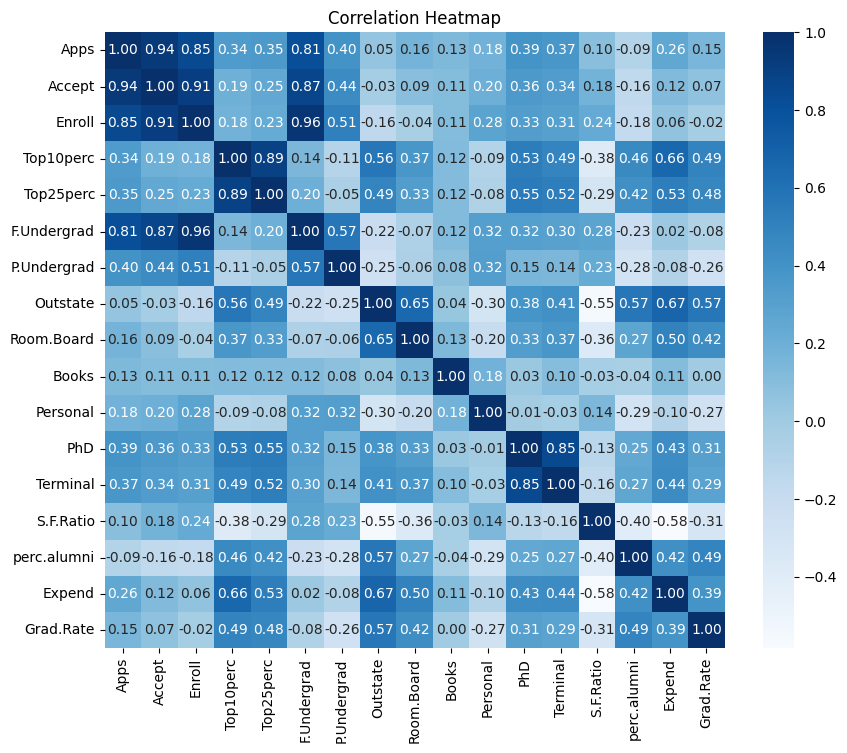

In [ ]:
correlation_matrix = Data.corr(numeric_only = True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

We observe that there is strong positive correlation between
* number of applications received and number of applicants accepted having correlation of 0.9434.

* number of new students enrolled and number of applicants accepted having correlation of 0.9116.

* number of full-time undergraduates and
number of applicants accepted having correlation of 0.8742.


We do mapping for the column 'Private' as follows.

In [ ]:
Data['Private']=Data['Private'].map({'No':0,'Yes':1}).astype(int)

Data1 = Data.drop(columns=['Institution'])

# Handling missing values if any
Data1.fillna(Data1.mean(), inplace=True)  # Filling missing values with column mean

Here we map the 'No' as 0 and 'Yes' as 1 in the "Private" column of the dataset.

Here, we are romoving the 'Institution column' as it has many unique objects just for ease in order to perform our interest.

However, colleges are not of our interest in the analysis.

In [ ]:
privateset=set(Data1['Private'])
print(Data1.head)

<bound method NDFrame.head of      Private   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0          1   1660    1232     721         23         52         2885   
1          1   2186    1924     512         16         29         2683   
2          1   1428    1097     336         22         50         1036   
3          1    417     349     137         60         89          510   
4          1    193     146      55         16         44          249   
..       ...    ...     ...     ...        ...        ...          ...   
772        0   2197    1515     543          4         26         3089   
773        1   1959    1805     695         24         47         2849   
774        1   2097    1915     695         34         61         2793   
775        1  10705    2453    1317         95         99         5217   
776        1   2989    1855     691         28         63         2988   

     P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0      

In [ ]:
X = Data1.drop(columns=['Apps'])  # Features
y = Data1['Apps']  # Target variable

We do splitting of the data for independent variable and dependent variable.

Here 'Apps' is the dependent variable and rest of the columns are independent variables.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_cols = ['Private']  # Assuming 'Private' is a categorical column

# Perform one-hot encoding on categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)
X_encoded

array([[0.0000e+00, 1.0000e+00, 1.2320e+03, ..., 1.2000e+01, 7.0410e+03,
        6.0000e+01],
       [0.0000e+00, 1.0000e+00, 1.9240e+03, ..., 1.6000e+01, 1.0527e+04,
        5.6000e+01],
       [0.0000e+00, 1.0000e+00, 1.0970e+03, ..., 3.0000e+01, 8.7350e+03,
        5.4000e+01],
       ...,
       [0.0000e+00, 1.0000e+00, 1.9150e+03, ..., 2.0000e+01, 8.3230e+03,
        4.9000e+01],
       [0.0000e+00, 1.0000e+00, 2.4530e+03, ..., 4.9000e+01, 4.0386e+04,
        9.9000e+01],
       [0.0000e+00, 1.0000e+00, 1.8550e+03, ..., 2.8000e+01, 4.5090e+03,
        9.9000e+01]])

Here we do the transformation of the data in order to bring all the variables of interest into the same magnitudinal dimension. We use the One hot encounter method to do it.

In [ ]:
from sklearn.model_selection import train_test_split
# taking test size as 20%
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Here we fix the test and train data ratio.

We have taken the test data size as 20% making train data size 80%.

## ***Subset Selection***

We import libraries.

In [ ]:
# importing libraries

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector as SFS

### ***Forward Selection***

In [ ]:
subset_F = SFS(LinearRegression(), direction='forward',scoring='neg_mean_squared_error')
subset_F.fit(X_train, y_train)
selected_feature_F = subset_F.get_support(indices=True)

X_train_forward = X_train[:, selected_feature_F]
X_test_forward = X_test[:, selected_feature_F]

model_forward = LinearRegression().fit(X_train_forward, y_train)
test_error_forward = mean_squared_error(y_test, model_forward.predict(X_test_forward))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


### ***Backward Selection***

In [ ]:
subset_B = SFS(LinearRegression(), direction='backward',scoring='neg_mean_squared_error')
subset_B.fit(X_train, y_train)
selected_feature_B = subset_B.get_support(indices=True)

X_train_backward = X_train[:, selected_feature_B]
X_test_backward = X_test[:, selected_feature_B]

model_backward = LinearRegression().fit(X_train_backward, y_train)
test_error_backward = mean_squared_error(y_test, model_backward.predict(X_test_backward))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


### ***Stepwise Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error


selector_sw = SFS(LinearRegression(),
                        k_features=5,
                        forward=True,
                        floating=True,
                        scoring='neg_mean_squared_error',
                        cv=5)

selector_sw.fit(X_train, y_train)

X_train_stepwise = selector_sw.transform(X_train)
X_test_stepwise = selector_sw.transform(X_test)

model_stepwise = selector_sw.k_feature_names_
model_stepwise = LinearRegression().fit(X_train_stepwise, y_train)
test_error_stepwise = mean_squared_error(y_test, model_stepwise.predict(X_test_stepwise))

Now, we fit a linear model using subset selection.

In [ ]:
# Fit linear model using subset selection
selector = SelectKBest(score_func=f_regression, k=5)

X_train_subset = selector.fit_transform(X_train, y_train)
X_test_subset = selector.transform(X_test)

model_subset = LinearRegression().fit(X_train_subset, y_train)
test_error_subset = mean_squared_error(y_test, model_subset.predict(X_test_subset))

## ***Cross Validation***

Cross-validation is a crucial step to assess the performance of your model on unseen data. It helps prevent overfitting and provides a more reliable estimate of how well your model will
generalize.

During cross-validation, the dataset is split into multiple folds, and the model is trained and
evaluated on different subsets

In [ ]:
print(f"Test error for subset selection: {test_error_subset}")
print(f"Test error for forward selection: {test_error_forward}")
print(f"Test error for backward selection: {test_error_backward}")
print(f"Test error for stepwise regression: {test_error_stepwise}")

Test error for subset selection: 2319323.738507166
Test error for forward selection: 1444526.337113498
Test error for backward selection: 1652086.2628553724
Test error for stepwise regression: 1575236.4019682214


Here we see that the test error for

1. subset selection is 2319323.74
2. forward selection is 1444526.34
3. backward selection is 1652086.26
4. stepwise regression is 1575236.40

We see that the forward selection has a least test error and subset selection has the most test error on comparison.

Now we perform cross validation and calculate the mean squared error for each model as below.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation for each model
cv_scores_subset = cross_val_score(model_subset, X_train_subset, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_forward = cross_val_score(model_forward, X_train_forward, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_backward = cross_val_score(model_backward, X_train_backward, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_stepwise = cross_val_score(model_stepwise, X_train_stepwise, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean squared error
mse_subset = np.mean(-cv_scores_subset)
mse_forward = np.mean(-cv_scores_forward)
mse_backward = np.mean(-cv_scores_backward)
mse_stepwise = np.mean(-cv_scores_stepwise)

# Compare the models
print(f"Mean Squared Error for subset selection: {mse_subset}")
print(f"Mean Squared Error for forward selection: {mse_forward}")
print(f"Mean Squared Error for backward selection: {mse_backward}")
print(f"Mean Squared Error for stepwise regression: {mse_stepwise}")

# Choose the model with the lowest mean squared error
best_model = min(mse_subset, mse_forward, mse_backward, mse_stepwise)
print(f"Best model: {'Subset Selection' if best_model == mse_subset else 'Forward Selection' if best_model == mse_forward else 'Backward Selection' if best_model == mse_backward else 'Stepwise Regression'}")

Mean Squared Error for subset selection: 1710868.447078423
Mean Squared Error for forward selection: 1227477.3791724183
Mean Squared Error for backward selection: 1224327.984090679
Mean Squared Error for stepwise regression: 1259523.708674111
Best model: Backward Selection


Here we see that the mean squared error for

1. subset selection is 1710868.45
2. forward selection is 1227477.38
3. backward selection is 1224327.98
4. stepwise regression is 1259523.7087

Here we see that the backward selection has the least mean square error and the subset selection has the most mean square error.

## ***Conclusion***

We see from the cross validation that the backward selection is preferred as it has less mean squared error when compared to others.

The observation to be made here is that,

even though the forward selection had the least test error, since it did not have the least mean square error it is not preferred.

So for the variable selection method to be a better one, it should have the least mean square error irrespective of its test error.
